In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/price-prediction-of-diamond/diamonds.csv


In [2]:
df = pd.read_csv("/kaggle/input/price-prediction-of-diamond/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df = df.drop("Unnamed: 0", axis=1)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Figure size 1000x600 with 0 Axes>

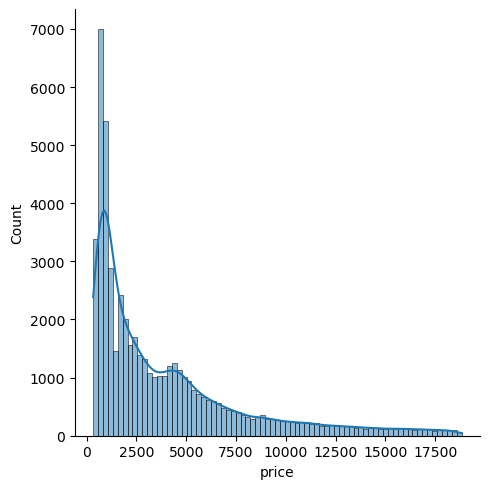

In [8]:
from scipy import stats
plt.figure(figsize=(10,6))
sns.displot(df["price"], bins=75,  kde=True)
plt.show();

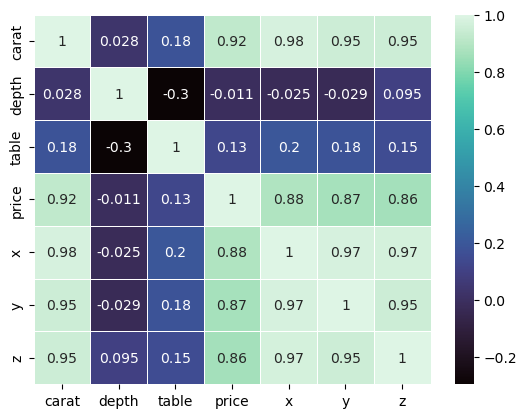

In [9]:
sns.heatmap(df.corr(), annot=True,linewidth=0.5, cmap="mako");

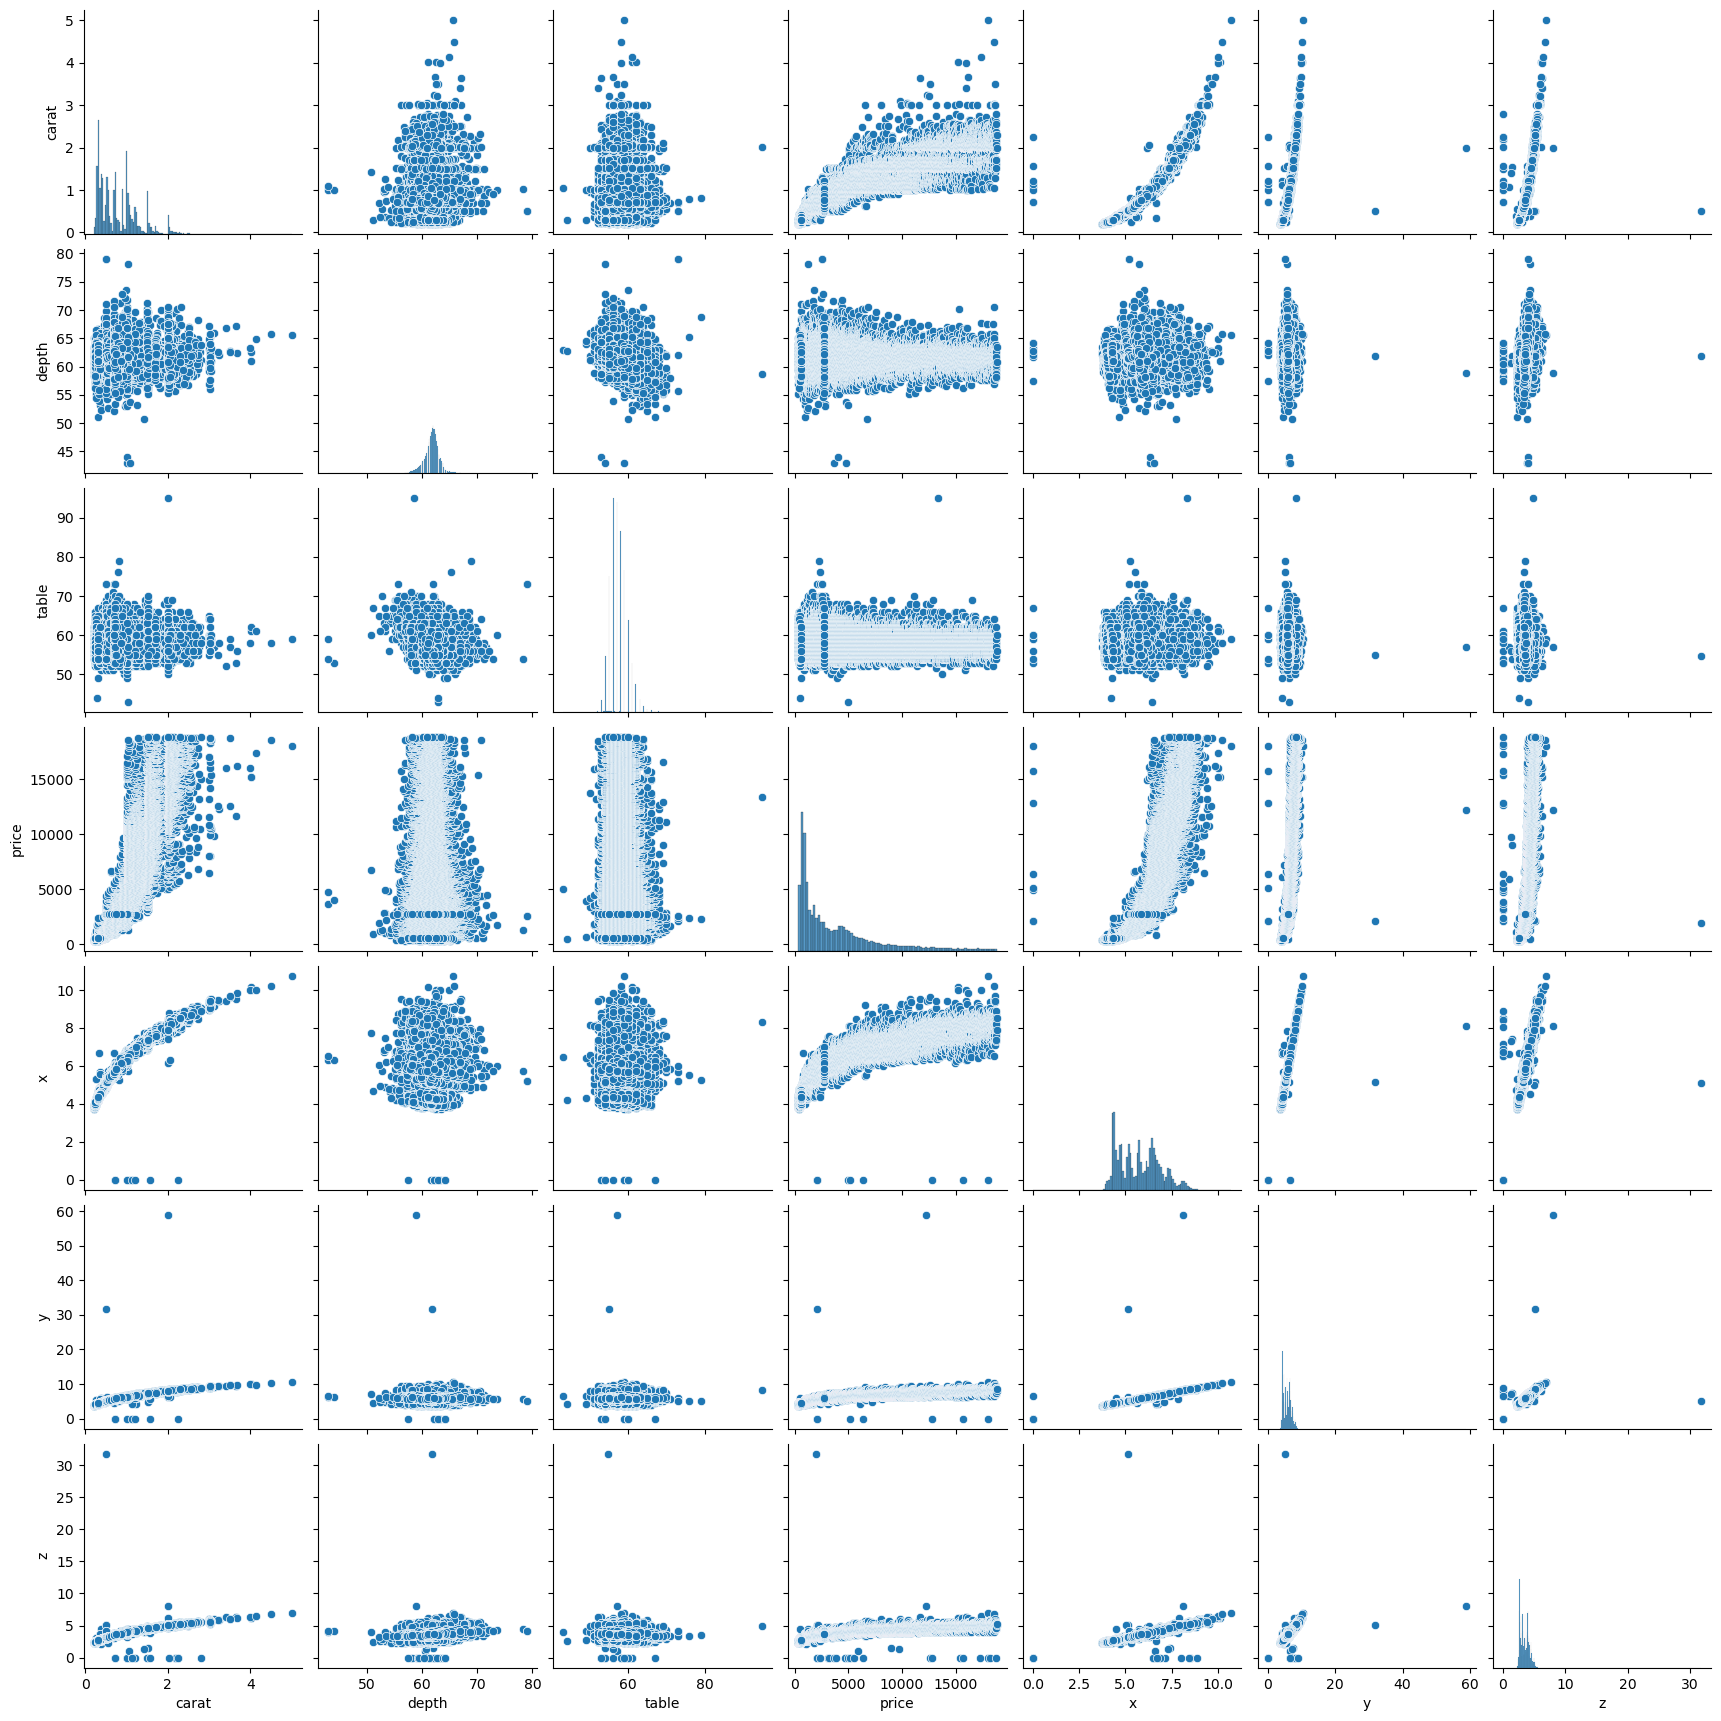

In [10]:
sns.pairplot(df);

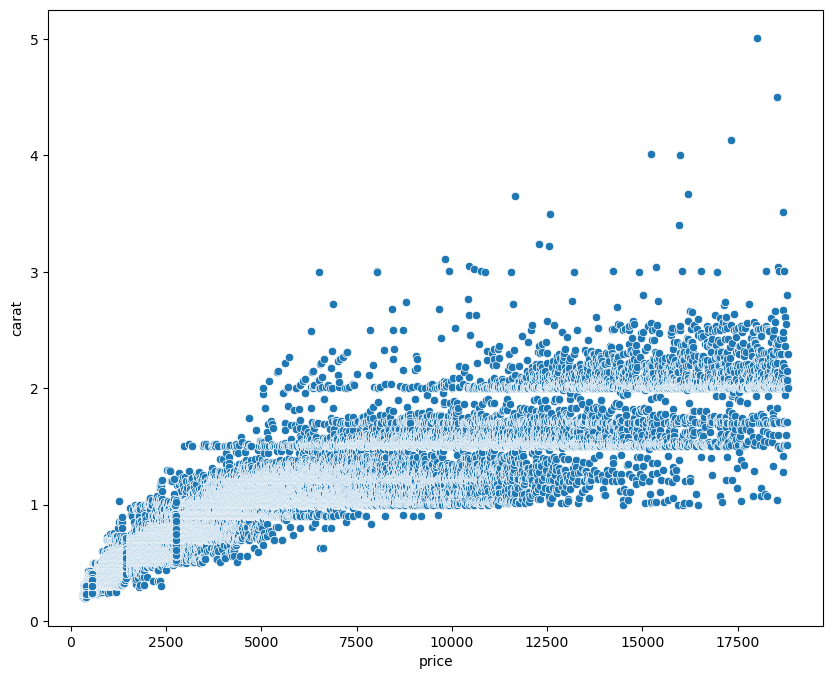

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="price", y="carat");

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [14]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [15]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [16]:
newdf = pd.get_dummies(df, drop_first=True)

In [17]:
newdf

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [18]:
X = newdf.drop("price", axis=1)
y = newdf["price"]

#use both lasso and elasticnet

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [20]:
from sklearn.linear_model import ElasticNet
elasnet = ElasticNet(max_iter=10000)

In [21]:
param_grid = {"alpha":[0.01, 0.1, 1,  50 ,100, 200] ,
                     "l1_ratio":[.1, .5, .7,.9, .95, .99, 1]
                     }

In [22]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=elasnet,
                   param_grid = param_grid,
                   scoring='neg_mean_squared_error',
                   cv=5,
                   verbose=1)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.1, 1, 50, 100, 200],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [24]:
grid.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [25]:
y_pred = grid.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {MAE}, RMSE: {RMSE}")

MAE: 746.2403202901544, RMSE: 1138.7059534797934


In [27]:
from sklearn.linear_model import Lasso

In [28]:
lasso = Lasso(max_iter=10000)

In [29]:
param_grid1 = {"alpha":[0.01, 0.1, 1,  50 ,100, 200]
                     }

In [30]:
grid1 = GridSearchCV(estimator=lasso,
                   param_grid = param_grid1,
                   scoring='neg_mean_squared_error',
                   cv=5,
                   verbose=1)

In [31]:
grid1.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.01, 0.1, 1, 50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [32]:
grid1.best_params_

{'alpha': 0.1}

In [33]:
y_pred1 = grid1.predict(X_test)

In [34]:
MAE = mean_absolute_error(y_test, y_pred1)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred1))

print(f"MAE: {MAE}, RMSE: {RMSE}")

MAE: 746.2403202901544, RMSE: 1138.7059534797934


In [35]:
from sklearn.linear_model import Ridge

In [36]:
ridge = Ridge()

In [37]:
param_grid2 = {"alpha":[0.01, 0.1, 1,  50 ,100, 200],
               "solver":["lsqr","auto"]
                     }

In [38]:
grid2 = GridSearchCV(estimator=ridge,
                     param_grid=param_grid2,
                     scoring='neg_mean_squared_error',
                   cv=5,
                   verbose=1)

In [39]:
grid2.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 50, 100, 200],
                         'solver': ['lsqr', 'auto']},
             scoring='neg_mean_squared_error', verbose=1)

In [40]:
grid2.best_params_

{'alpha': 0.1, 'solver': 'auto'}

In [41]:
y_pred2 = grid2.predict(X_test)

In [42]:
MAE = mean_absolute_error(y_test, y_pred2)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred2))

print(f"MAE: {MAE}, RMSE: {RMSE}")

MAE: 746.8761480608343, RMSE: 1139.3353982590213


In [43]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [44]:
base = DecisionTreeRegressor(criterion='squared_error',max_depth=8, min_samples_split=5, min_samples_leaf=5, max_features=3)
base.fit(X_train,y_train)
y_pred3 = base.predict(X_test)

In [45]:
MAE = mean_absolute_error(y_test, y_pred3)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred3))

print(f"MAE: {MAE}, RMSE: {RMSE}")

MAE: 691.5338950323876, RMSE: 1245.6084317960078


In [46]:
 from sklearn.ensemble import RandomForestRegressor

In [47]:
regr = RandomForestRegressor(criterion='squared_error',max_depth=8, min_samples_split=5, min_samples_leaf=5, max_features=3)
regr.fit(X_train,y_train)
y_pred4 = regr.predict(X_test)

In [48]:
MAE = mean_absolute_error(y_test, y_pred4)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred4))

print(f"MAE: {MAE}, RMSE: {RMSE}")

MAE: 586.4895415511389, RMSE: 1028.2313717413342


In [49]:
from sklearn.linear_model import LassoCV
reg = LassoCV( random_state=0).fit(X_train,y_train)
reg.score(X_train,y_train)

0.9153179124380721

In [50]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(n_estimators=1000, random_state=0
)

regr_1.fit(X_train,y_train)
regr_2.fit(X_train,y_train)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [51]:
MAE = mean_absolute_error(y_test, y_1)
RMSE = np.sqrt(mean_squared_error(y_test, y_1))

print(f"MAE: {MAE}, RMSE: {RMSE}")

MAE: 709.4501763894199, RMSE: 1275.4557437218532


In [52]:
MAE = mean_absolute_error(y_test, y_2)
RMSE = np.sqrt(mean_squared_error(y_test, y_2))

print(f"MAE: {MAE}, RMSE: {RMSE}")

MAE: 2399.2933891908074, RMSE: 2667.3912103946213


In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


adaboost_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                  n_estimators=100, learning_rate=0.1, loss='linear')

# Fit the model on the training data
adaboost_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost_reg.predict(X_test)




In [54]:
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {MAE}, RMSE: {RMSE}")

MAE: 867.4921827549335, RMSE: 1397.2111909244493


# custom gradient boost


In [55]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor


class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, max_depth=3, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.trees = []
        self.intercept = None

    def fit(self, X, y):
        # Calculate initial predictions (mean of y)
        self.intercept = np.mean(y)
        predictions = np.full(y.shape[0], self.intercept)

        # Fit a sequence of decision trees
        for i in range(self.n_estimators):
            # Compute negative gradient of loss function
            residuals = y - predictions

            # Fit a decision tree to negative gradient
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, -residuals)

            # Update predictions
            predictions -= self.learning_rate * tree.predict(X)

            # Add tree to list of estimators
            self.trees.append(tree)

    def predict(self, X):
        # Calculate initial predictions (mean of y)
        predictions = np.full(X.shape[0], self.intercept)

        # Add predictions from each tree
        for tree in self.trees:
            predictions -= self.learning_rate * tree.predict(X)

        return predictions

# Initialize and fit the model
model = GradientBoostingRegressor()
model.fit(X_train,y_train)


y_pred = model.predict(X_test)


In [56]:
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {MAE}, RMSE: {RMSE}")

MAE: 442.0729162198684, RMSE: 842.6507020874047


# custom catboost


In [57]:
y = df['price']
X_tmp = df.drop('price', axis=1)


In [58]:
from sklearn.model_selection import train_test_split
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_tmp, y, test_size=0.2, random_state=101)

In [59]:
import math,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [61]:
LEARNING_RATE = 0.5
DEPTH = 1
ITERATIONS = 100
NON_NUMERICALS = ["cut", "color", "clarity"]

In [62]:
def target_encoding(X, y, non_nums, m = 0.1):
    
    info_dict = dict()
    
    
    overall_mean = y.mean()
    bayesian_mean = lambda n, m, opt, ovr: ((n*opt) + (m*ovr)) / (n+m)
    
    for column in non_nums:
        value_counts = X[column].value_counts()
        class_names = value_counts.index
        
        _sum = 0
        _mean = 0
        
        for class_index_in_value_counts, class_name in enumerate(class_names):
            indexes = X[X[column]==class_name].index
            
            for ind in indexes:
                _sum += y[ind]
                
            _n = value_counts[class_index_in_value_counts]
            _opt_mean = _sum/ _n
            
            _mean = bayesian_mean(_n, m, _opt_mean, overall_mean)
        
            X[column].replace(class_name, _mean, inplace=True)
            
            if column in info_dict:
                info_dict[column].update({class_name: _mean})
            else:
                info_dict[column] = {class_name: _mean}
     
    return X, info_dict

In [63]:
class CatBoost:
    def __init__(self, learning_rate=0.05, depth=1, l2_leaf_reg=3, iterations=100,non_nums= []):
        self.learning_rate = learning_rate
        self.depth = depth
        self.iterations = iterations
        self.l2_leaf_reg = l2_leaf_reg
        self.trees = []
        self.non_numerical_columns = non_nums
        self.info_dict = dict()
        
    def fit(self, X_train, y_train):
    
        y_pred = np.zeros(y_train.shape[0], dtype=float)
        
        if not self.non_numerical_columns is None:
            X_train, self.info_dict = target_encoding(X_train, y_train, self.non_numerical_columns)
        
        for i in range(self.iterations):
            
            residuals = y_train - y_pred
    
            tree = self._fit_tree(X_train, residuals)
            
            y_pred += math.cos(self.learning_rate) * tree.predict(X_train)
            
            self.trees.append(tree)
            
    def _fit_tree(self, X_train, residuals):
        
        tree = DecisionTreeRegressor(
            max_depth=self.depth, 
            random_state=42
        )
        
        tree.fit(X_train, residuals)
        
        return tree
    
    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0], dtype=float) # to handle more than one test data at the same time.
        
        for __col in self.non_numerical_columns:
            X_test[__col] = X_test[__col].map(lambda v: self.info_dict[__col][v])
        
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X_test)
            
        return y_pred

In [64]:
catb = CatBoost(learning_rate=LEARNING_RATE, depth=DEPTH, iterations=ITERATIONS, non_nums=NON_NUMERICALS)

catb.fit(X_trainn, y_trainn)

In [65]:
y_pred = catb.predict(X_testt)
MAE = mean_absolute_error(y_testt, y_pred)
RMSE = np.sqrt(mean_squared_error(y_testt, y_pred))

print(f"MAE: {MAE}, RMSE: {RMSE}")

MAE: 1714.415895333324, RMSE: 2609.6627334571704


# custom xgboost

In [66]:
import math
import numpy as np 
import pandas as pd
from collections import defaultdict

In [67]:
class XGBoostModel():
    '''XGBoost from Scratch
    '''
    
    def __init__(self, params, random_seed=None):
        self.params = defaultdict(lambda: None, params)
        self.subsample = self.params['subsample'] \
            if self.params['subsample'] else 1.0
        self.learning_rate = self.params['learning_rate'] \
            if self.params['learning_rate'] else 0.3
        self.base_prediction = self.params['base_score'] \
            if self.params['base_score'] else 0.5
        self.max_depth = self.params['max_depth'] \
            if self.params['max_depth'] else 5
        self.rng = np.random.default_rng(seed=random_seed)
                
    def fit(self, X, y, objective, num_boost_round, verbose=False):
        current_predictions = self.base_prediction * np.ones(shape=y.shape)
        self.boosters = []
        for i in range(num_boost_round):
            gradients = objective.gradient(y, current_predictions)
            hessians = objective.hessian(y, current_predictions)
            sample_idxs = None if self.subsample == 1.0 \
                else self.rng.choice(len(y), 
                                     size=math.floor(self.subsample*len(y)), 
                                     replace=False)
            booster = TreeBooster(X, gradients, hessians, 
                                  self.params, self.max_depth, sample_idxs)
            current_predictions += self.learning_rate * booster.predict(X)
            self.boosters.append(booster)
            if verbose: 
                print(f'[{i}] train loss = {objective.loss(y, current_predictions)}')
            
    def predict(self, X):
        return (self.base_prediction + self.learning_rate 
                * np.sum([booster.predict(X) for booster in self.boosters], axis=0))

In [68]:
class TreeBooster():
 
    def __init__(self, X, g, h, params, max_depth, idxs=None):
        self.params = params
        self.max_depth = max_depth
        assert self.max_depth >= 0, 'max_depth must be nonnegative'
        self.min_child_weight = params['min_child_weight'] \
            if params['min_child_weight'] else 1.0
        self.reg_lambda = params['reg_lambda'] if params['reg_lambda'] else 1.0
        self.gamma = params['gamma'] if params['gamma'] else 0.0
        self.colsample_bynode = params['colsample_bynode'] \
            if params['colsample_bynode'] else 1.0
        if isinstance(g, pd.Series): g = g.values
        if isinstance(h, pd.Series): h = h.values
        if idxs is None: idxs = np.arange(len(g))
        self.X, self.g, self.h, self.idxs = X, g, h, idxs
        self.n, self.c = len(idxs), X.shape[1]
        self.value = -g[idxs].sum() / (h[idxs].sum() + self.reg_lambda) # Eq (5)
        self.best_score_so_far = 0.
        if self.max_depth > 0:
            self._maybe_insert_child_nodes()

    def _maybe_insert_child_nodes(self):
        for i in range(self.c): self._find_better_split(i)
        if self.is_leaf: return
        x = self.X.values[self.idxs,self.split_feature_idx]
        left_idx = np.nonzero(x <= self.threshold)[0]
        right_idx = np.nonzero(x > self.threshold)[0]
        self.left = TreeBooster(self.X, self.g, self.h, self.params, 
                                self.max_depth - 1, self.idxs[left_idx])
        self.right = TreeBooster(self.X, self.g, self.h, self.params, 
                                 self.max_depth - 1, self.idxs[right_idx])

    @property
    def is_leaf(self): return self.best_score_so_far == 0.
    
    def _find_better_split(self, feature_idx):
        x = self.X.values[self.idxs, feature_idx]
        g, h = self.g[self.idxs], self.h[self.idxs]
        sort_idx = np.argsort(x)
        sort_g, sort_h, sort_x = g[sort_idx], h[sort_idx], x[sort_idx]
        sum_g, sum_h = g.sum(), h.sum()
        sum_g_right, sum_h_right = sum_g, sum_h
        sum_g_left, sum_h_left = 0., 0.

        for i in range(0, self.n - 1):
            g_i, h_i, x_i, x_i_next = sort_g[i], sort_h[i], sort_x[i], sort_x[i + 1]
            sum_g_left += g_i; sum_g_right -= g_i
            sum_h_left += h_i; sum_h_right -= h_i
            if sum_h_left < self.min_child_weight or x_i == x_i_next:continue
            if sum_h_right < self.min_child_weight: break

            gain = 0.5 * ((sum_g_left**2 / (sum_h_left + self.reg_lambda))
                            + (sum_g_right**2 / (sum_h_right + self.reg_lambda))
                            - (sum_g**2 / (sum_h + self.reg_lambda))
                            ) - self.gamma/2 # Eq(7) in the xgboost paper
            if gain > self.best_score_so_far: 
                self.split_feature_idx = feature_idx
                self.best_score_so_far = gain
                self.threshold = (x_i + x_i_next) / 2
                
    def predict(self, X):
        return np.array([self._predict_row(row) for i, row in X.iterrows()])

    def _predict_row(self, row):
        if self.is_leaf: 
            return self.value
        child = self.left if row[self.split_feature_idx] <= self.threshold \
            else self.right
        return child._predict_row(row)

In [69]:
class SquaredErrorObjective():
    def loss(self, y, pred): return np.mean((y - pred)**2)
    def gradient(self, y, pred): return pred - y
    def hessian(self, y, pred): return np.ones(len(y))

In [70]:
params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'reg_lambda': 1.5,
    'gamma': 0.0,
    'min_child_weight': 25,
    'base_score': 0.0,
    'tree_method': 'exact',
}
num_boost_round = 50

# train the from-scratch XGBoost model
model = XGBoostModel(params, random_seed=42)

In [71]:
model.fit(X_train,y_train, SquaredErrorObjective(), num_boost_round)
y_pred = model.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 777.9906829563205


#### 